# Iris Classifier

# Table of Contents
-  [Problem Statement](#section1)</br>
-  [Load the packages and data](#section2)</br>
-  [Preprocessing](#section3)</br>
    - [Missing Values](#section301)<br/>
    - [Correlation between Target and Features](#section302)<br/>
    - [Handling Categorical Features](#section303)<br/>
-  [Model Development](#section4)</br>
    - [Preparing X and y using pandas](#section401)<br/>
    - [Splitting X and y into training and test datasets](#section402)<br/>
    - [Logistic Regression](#section403)<br/>
    - [Decision Tree Classifier](#section404)<br/>
    - [Random Forest Classifier](#section405)<br/>
    - [KNN Classifier](#section406)<br/>
    - [Naive Bayes Classifier](#section407)<br/>
    - [Support Vector Classifier](#section408)<br/>
-  [Model Evaluation](#section5)</br>
-  [Auto ML](#section6)</br>
-  [Neural Network Approach](#section7)<br/>
-  [Conclusion](#section8)<br/>

<a id=section1></a> 
# 1. Problem Statement

Given the dataset containing Iris Species of flowers, different Machine Learning models to predict the species of a flower

<a id=section2></a> 
## 2. Load the packages and data
<section1>
<br/>

In [74]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import warnings
import pandas_profiling 
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 200)


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn import tree
from sklearn import ensemble
from sklearn import linear_model
from sklearn import model_selection

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [75]:
iris = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
iris.shape

(150, 6)

In [77]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


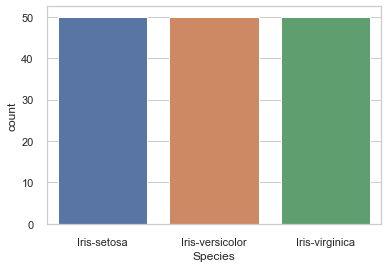

In [78]:
sns.countplot(iris.Species)

#### Looking at the count plot,  It is an balanced dataset

<a id=section3></a> 
# 3. Preprocessing

In [79]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Removing id column

In [80]:
iris = iris.drop(['Id'], axis=1)

<a id=section301></a> 
## 3.1 Missing Values

In [81]:
dataset_na = (iris.isnull().sum() / len(iris)) * 100
dataset_na = dataset_na.drop(dataset_na[dataset_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :dataset_na})
missing_data.head(20)

,Missing Ratio


There is no missing value in the dataset

<a id=section302></a> 
## 3.2 Find Correlation

<Figure size 432x288 with 0 Axes>

(4, 0)

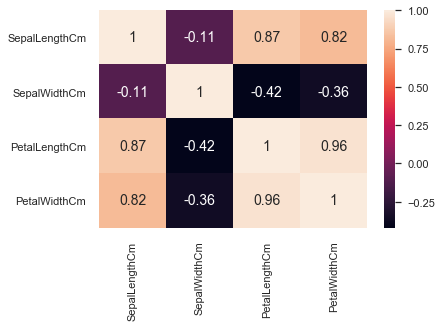

In [82]:
plt.figure(figsize=(6,4))
sns.heatmap(iris.corr(),annot=True) 
plt.ylim(4,0)

#### Looking at the coorelation heatmap
- PetalLengnthCm and PetalWidthCm are positively correlated
- PetalWidthCm and SepalLengthCm are positively correlated
- SepalLengthCm and PetalLengnthCm are positively coorelated

### Scatter Plots

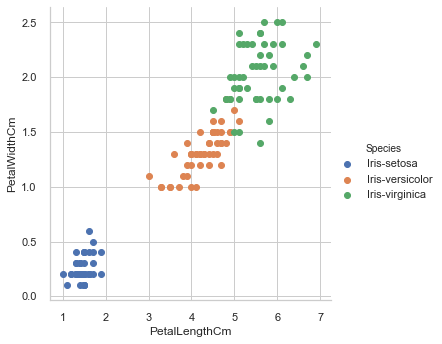

In [83]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

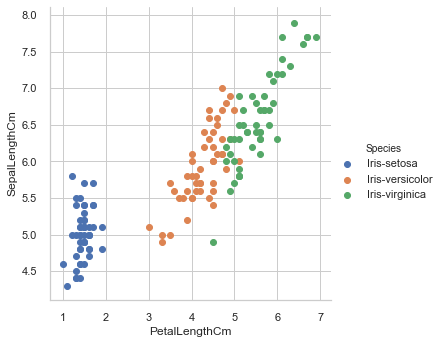

In [84]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "SepalLengthCm") \
   .add_legend()

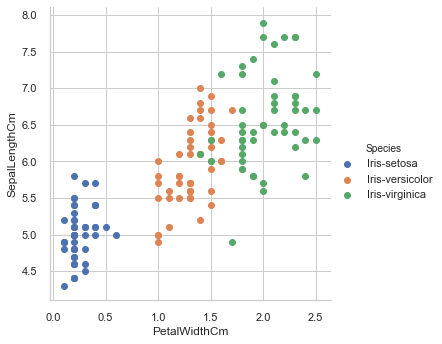

In [85]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "PetalWidthCm", "SepalLengthCm") \
   .add_legend()

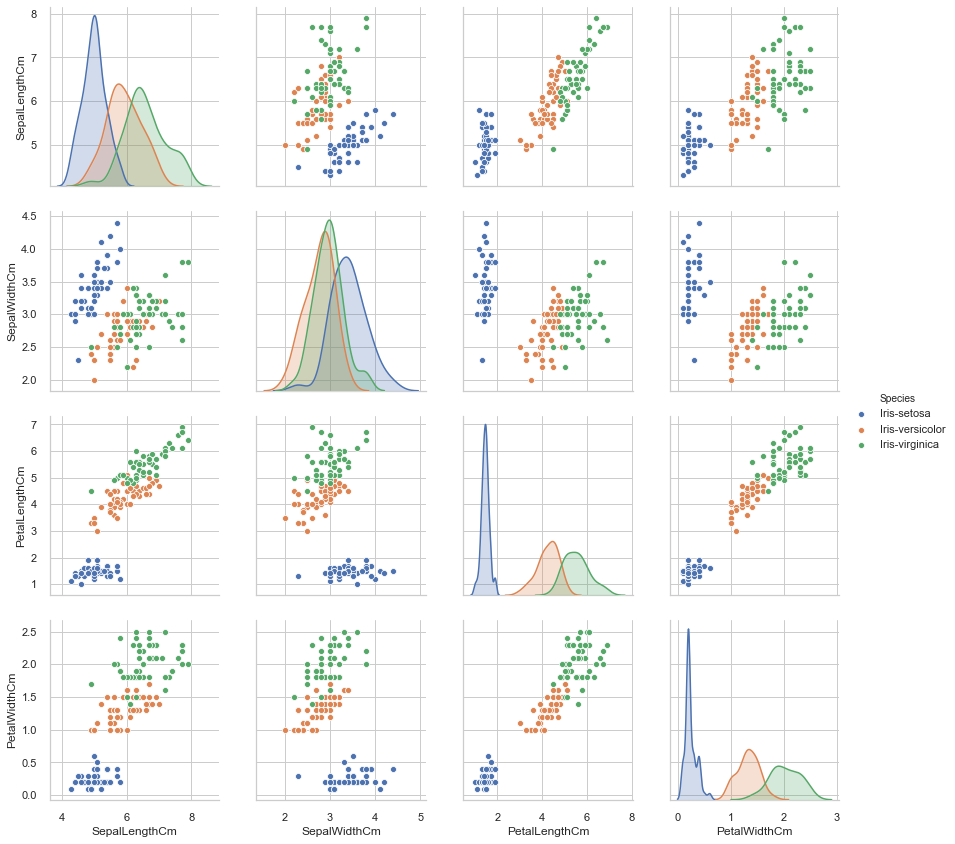

In [86]:
sns.pairplot(iris, hue="Species", size=3)

<a id=section303></a> 
## 3.3 Handling Categorical Features 

#### Encoding the Target Variable - Species

In [87]:
le = LabelEncoder()
iris.Species = le.fit_transform(iris.Species)

In [88]:
iris['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [89]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<a id=section4></a> 
# 4. Model Development

<a id=section401></a> 
## 4.1 Preparing X and y using pandas

In [90]:
X = iris.loc[:,iris.columns != 'Species']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
y = iris["Species"]
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [92]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


<a id=section402></a> 
## 4.2 Splitting X and y into training and test datasets.
 

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [94]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


## Standardizing the variables

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id=section403></a> 
## 4.3 Logistic Regression 

In [96]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

In [98]:
# Accuracy for Logistic Regression
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train_lr))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test_lr))

Accuracy score for train data is: 0.975
Accuracy score for test data is: 0.9666666666666667


In [99]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_lr))
confusion_matrix.index = ['Actual 1','Actual 2','Actual 3']
confusion_matrix.columns = ['Predicted 1','Predicted 2','Predicted 3']
print(confusion_matrix)

          Predicted 1  Predicted 2  Predicted 3
Actual 1           11            0            0
Actual 2            0           12            1
Actual 3            0            0            6


In [100]:
lr_report = classification_report(y_test, y_pred_test_lr)
print(lr_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



<a id=section404></a> 
## 4.4 Decision Tree Classifier

In [101]:
dt = tree.DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [102]:
y_pred_train_dt = dt.predict(X_train)  
y_pred_test_dt = dt.predict(X_test)  

In [103]:
# Accuracy for Decision Tree
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train_dt))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test_dt))

Accuracy score for train data is: 1.0
Accuracy score for test data is: 0.9666666666666667


In [104]:
dt_report = classification_report(y_test, y_pred_test_dt)
print(dt_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



<a id=section405></a> 
## 4.5 Random Forest Classifier 

In [105]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [106]:
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

In [107]:
# Accuracy for Random Forest
print('Accuracy score for train data:', accuracy_score(y_train,y_pred_train_rf))
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test_rf))

Accuracy score for train data: 1.0
Accuracy score for test data using the model without parameter specification: 0.9666666666666667


In [108]:
rf_report = classification_report(y_test, y_pred_test_rf)
print(rf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



<a id=section406></a> 
## 4.6 KNN Classifier 

In [109]:
knn=KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [110]:
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

In [111]:
# Accuracy for KNN
print('Accuracy score for train data:', accuracy_score(y_train,y_pred_train_knn))
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test_knn))


Accuracy score for train data: 0.95
Accuracy score for test data using the model without parameter specification: 1.0


In [112]:
knn_report = classification_report(y_test, y_pred_test_knn)
print(knn_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_knn))
confusion_matrix.index = ['Actual 1','Actual 2','Actual 3']
confusion_matrix.columns = ['Predicted 1','Predicted 2','Predicted 3']
print(confusion_matrix)

          Predicted 1  Predicted 2  Predicted 3
Actual 1           11            0            0
Actual 2            0           13            0
Actual 3            0            0            6


<a id=section407></a> 
## 4.7 Naive Bayes Classifier 

In [114]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [115]:
y_pred_train_nb = nb.predict(X_train)
y_pred_test_nb = nb.predict(X_test)

In [116]:
# Accuracy for Naive Bayes
print('Accuracy score for train data:', accuracy_score(y_train,y_pred_train_nb))
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test_nb))


Accuracy score for train data: 0.95
Accuracy score for test data using the model without parameter specification: 0.9666666666666667


In [117]:
nb_report = classification_report(y_test, y_pred_test_nb)
print(nb_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



<a id=section408></a> 
## 4.8 Support Vector Classifier 

In [118]:
svc = SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [119]:
y_pred_train_svc = svc.predict(X_train)
y_pred_test_svc = svc.predict(X_test)

In [120]:
# Accuracy for Support Vector
print('Accuracy score for train data:', accuracy_score(y_train,y_pred_train_svc))
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test_svc))


Accuracy score for train data: 0.9666666666666667
Accuracy score for test data using the model without parameter specification: 0.9666666666666667


In [121]:
svc_report = classification_report(y_test, y_pred_test_svc)
print(svc_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



<a id=section5></a> 
# 5. Model Evaluation

In [122]:
model_names = ['--------------------Logistic Regression---------------------\n',  
               '\n------------------Decsision Classifier------------------\n', 
               '\n----------------Random Forest Classifier------------\n',
              '\n--------------------KNN Classifier------------\n',
              '\n-----------------Naive Bayes Classifier------------\n',
              '\n--------------Support Vector Classifier------------\n']
report = model_names[0] + lr_report + model_names[1] + dt_report + model_names[2] + rf_report \
+ model_names[3] + knn_report + model_names[4] + nb_report + model_names[5] + svc_report
print(report)


--------------------Logistic Regression---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

------------------Decsision Classifier------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

----------------Random Forest Classifier------------
              precision    recall  f1-score   support

           0

<a id=section6></a> 
# 6. Auto ML


In [123]:
MLA = [
    #Ensemble Methods
    ensemble.RandomForestClassifier(),

    
    #Linear Model
    linear_model.LogisticRegression(),
    
    #Tree   
    tree.DecisionTreeClassifier()  ,
    
    
    ]

In [124]:
#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%


In [125]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time', 'TrainTestDifference']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = iris[["Species"]]  # Y 

#index through MLA and save performance to table
row_index = 0
Feature_Importance = {}

In [126]:
Y = iris["Species"].values.reshape(-1, 1)

In [127]:
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X, Y, cv  = cv_split,return_train_score=True,scoring='f1_weighted')

    
    # cv_result is a dictionary -> All the results of diff models are saved 
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    #MLA_compare.loc[row_index, 'TrainTestDifference'] = cv_results['train_score'].mean() - cv_results['test_score'].mean() 

    #save MLA predictions - see section 6 for usage
    alg.fit(X, Y)

    try:
      Feature_Importance[MLA_name] = alg.feature_importances_
    except AttributeError:
      pass
      
    MLA_predict[MLA_name] = alg.predict(X)
    
    row_index+=1
    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
MLA_compare['TrainTestDifference'] = (MLA_compare['MLA Test Accuracy Mean']-MLA_compare['MLA Train Accuracy Mean'])*100
MLA_compare   

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,TrainTestDifference
1,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_st...",0.973305,0.951236,0.0775556,0.0207969,NaN
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0....",1,0.946626,0.0909615,0.102526,NaN
2,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_sample...",1,0.942173,0.0907546,0.00160546,NaN


,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,TrainTestDifference
1,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_st...",0.973305,0.951236,0.0775556,0.0207969,-2.20696
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0....",1,0.946626,0.0909615,0.102526,-5.3374
2,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_sample...",1,0.942173,0.0907546,0.00160546,-5.78267


<a id=section7></a> 
# 7. Neural Network Approach

In [128]:
#class 0 [0,0,1]
#class 1 [0,1,0]
#class 2 [0,0,1]

In [129]:
y = to_categorical(y)

In [130]:
y.shape

(150, 3)

In [131]:
X = X.values

In [132]:
X.shape

(150, 4)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
from keras.models import Sequential
from keras.layers import Dense

In [136]:
model=Sequential()
model.add(Dense(16, activation='relu', input_dim=4))
model.add(Dense(32, activation='relu', input_dim=4))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()             

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 99        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [137]:
model.fit(X_train, y_train,epochs=150, verbose=2)

Epoch 1/150
 - 0s - loss: 1.1100 - accuracy: 0.2750
Epoch 2/150
 - 0s - loss: 1.0651 - accuracy: 0.4833
Epoch 3/150
 - 0s - loss: 1.0226 - accuracy: 0.6833
Epoch 4/150
 - 0s - loss: 0.9822 - accuracy: 0.6917
Epoch 5/150
 - 0s - loss: 0.9395 - accuracy: 0.6917
Epoch 6/150
 - 0s - loss: 0.8995 - accuracy: 0.7000
Epoch 7/150
 - 0s - loss: 0.8626 - accuracy: 0.7167
Epoch 8/150
 - 0s - loss: 0.8231 - accuracy: 0.7333
Epoch 9/150
 - 0s - loss: 0.7871 - accuracy: 0.7583
Epoch 10/150
 - 0s - loss: 0.7516 - accuracy: 0.8000
Epoch 11/150
 - 0s - loss: 0.7157 - accuracy: 0.8167
Epoch 12/150
 - 0s - loss: 0.6819 - accuracy: 0.8167
Epoch 13/150
 - 0s - loss: 0.6492 - accuracy: 0.8167
Epoch 14/150
 - 0s - loss: 0.6174 - accuracy: 0.8167
Epoch 15/150
 - 0s - loss: 0.5876 - accuracy: 0.8333
Epoch 16/150
 - 0s - loss: 0.5590 - accuracy: 0.8583
Epoch 17/150
 - 0s - loss: 0.5334 - accuracy: 0.8583
Epoch 18/150
 - 0s - loss: 0.5088 - accuracy: 0.8500
Epoch 19/150
 - 0s - loss: 0.4856 - accuracy: 0.8500
Ep

In [146]:
predictions_train = model.predict_classes(X_train)
predictions_test = model.predict_classes(X_test)

In [147]:
y_test.argmax(axis=1)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [149]:
# Accuracy for Neural Network
print('Accuracy score for train data:', accuracy_score(y_train.argmax(axis=1),predictions_train))
print('Accuracy score for test data:', accuracy_score(y_test.argmax(axis=1),predictions_test))


Accuracy score for train data: 0.9916666666666667
Accuracy score for test data: 0.9666666666666667


In [141]:
nn_report = classification_report(y_test.argmax(axis=1), predictions)
print(nn_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [142]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), predictions))
cm.index = ['Actual 1','Actual 2','Actual 3']
cm.columns = ['Predicted 1','Predicted 2','Predicted 3']
print(cm)

          Predicted 1  Predicted 2  Predicted 3
Actual 1           11            0            0
Actual 2            0           12            1
Actual 3            0            0            6


In [143]:
model.save('iris_nn_model.h5')

In [144]:
from keras.models import load_model
new_model = load_model('iris_nn_model.h5')

In [145]:
new_model.predict_classes(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

<a id=section8></a> 
# 8. Conclusion


- KNN Classifier is the best model in terms of accuracy comparison to other models evaluated
- Support Vector is the best model in terms of generalization as zero diff between train and test score